In [62]:
import pandas as pd
import numpy as np

In [63]:
df =  pd.read_csv("diabetic_data.csv")

print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [64]:
len(list(df.columns))

50

In [65]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [66]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [67]:
df.head()['age']

0     [0-10)
1    [10-20)
2    [20-30)
3    [30-40)
4    [40-50)
Name: age, dtype: object

In [68]:
age_mapping = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
               '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}
df['age_trans'] = df['age'].map(age_mapping)
df['age_trans'] 

0          5
1         15
2         25
3         35
4         45
          ..
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age_trans, Length: 101766, dtype: int64

In [69]:
# unique values in column
set(list(df['readmitted']))

{'<30', '>30', 'NO'}

In [70]:
df.groupby(['age', 'readmitted']).size()

age       readmitted
[0-10)    <30               3
          >30              26
          NO              132
[10-20)   <30              40
          >30             224
          NO              427
[20-30)   <30             236
          >30             510
          NO              911
[30-40)   <30             424
          >30            1187
          NO             2164
[40-50)   <30            1027
          >30            3278
          NO             5380
[50-60)   <30            1668
          >30            5917
          NO             9671
[60-70)   <30            2502
          >30            7897
          NO            12084
[70-80)   <30            3069
          >30            9475
          NO            13524
[80-90)   <30            2078
          >30            6223
          NO             8896
[90-100)  <30             310
          >30             808
          NO             1675
dtype: int64

In [71]:
df.groupby(['age', 'readmitted']).size().unstack()

readmitted,<30,>30,NO
age,,,
[0-10),3,26,132
[10-20),40,224,427
[20-30),236,510,911
[30-40),424,1187,2164
[40-50),1027,3278,5380
[50-60),1668,5917,9671
[60-70),2502,7897,12084
[70-80),3069,9475,13524
[80-90),2078,6223,8896


<Figure size 1000x600 with 0 Axes>

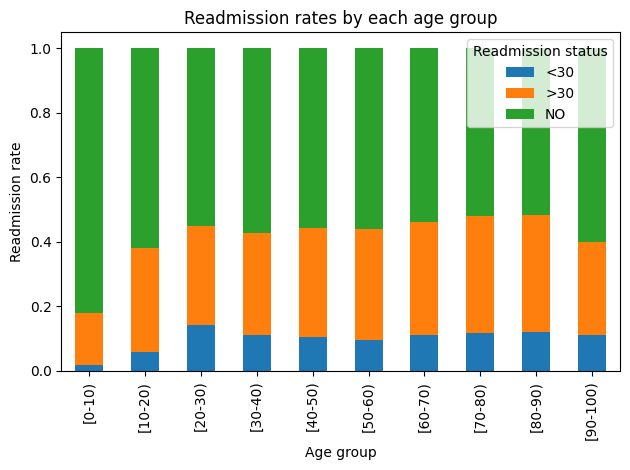

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

readmission_rates = df.groupby(['age', 'readmitted']).size().unstack()
readmission_rates = readmission_rates.div(readmission_rates.sum(axis=1), axis=0)

# Plot the readmission rates using a  bar plot
plt.figure(figsize=(10, 6))
readmission_rates.plot(kind='bar', stacked=True)
plt.title('Readmission rates by each age group')
plt.xlabel('Age group')
plt.ylabel('Readmission rate')

plt.legend(title='Readmission status', loc='upper right')
plt.tight_layout()
plt.show()

In [73]:
print(set(list(df['gender'])))
readmission_rates = df.groupby(['gender', 'readmitted']).size().unstack()
readmission_rates.div(readmission_rates.sum(axis=1), axis=0)
readmission_rates

{'Unknown/Invalid', 'Male', 'Female'}


readmitted,<30,>30,NO
gender,,,
Female,6152.0,19518.0,29038.0
Male,5205.0,16027.0,25823.0
Unknown/Invalid,NaN,NaN,3.0


<Figure size 1000x600 with 0 Axes>

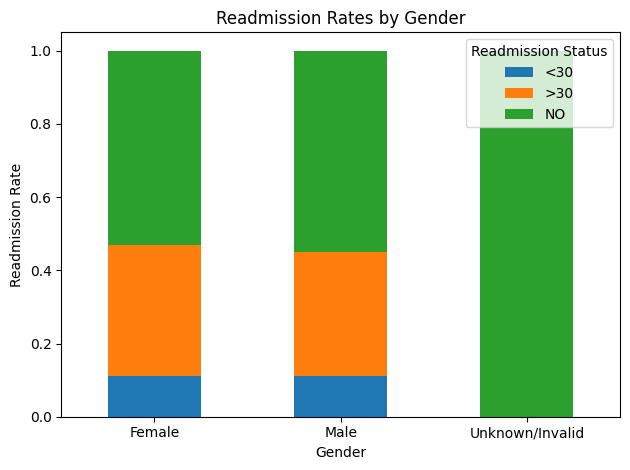

In [74]:
readmission_rates = df.groupby(['gender', 'readmitted']).size().unstack()
readmission_rates = readmission_rates.div(readmission_rates.sum(axis=1), axis=0)

# Plot the readmission bar plot
plt.figure(figsize=(10, 6))
readmission_rates.plot(kind='bar', stacked=True)
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=0)
plt.legend(title='Readmission Status', loc='upper right')
plt.tight_layout()
plt.show()

In [75]:
print(set(list(df['race'])))

{'?', 'Asian', 'AfricanAmerican', 'Hispanic', 'Caucasian', 'Other'}


<Figure size 1000x600 with 0 Axes>

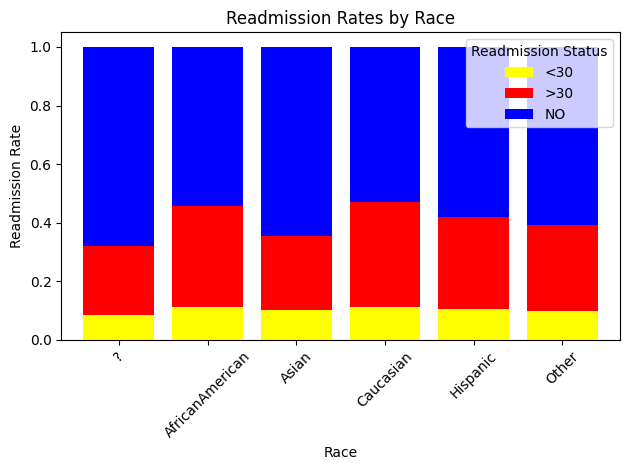

In [76]:
readmission_rates = df.groupby(['race', 'readmitted']).size().unstack()
readmission_rates = readmission_rates.div(readmission_rates.sum(axis=1), axis=0)

# Plot the readmission rates using a bar plot
plt.figure(figsize=(10, 6))
readmission_rates.plot(kind='bar', stacked=True, color=['yellow', 'red', 'blue'], width=0.8)
plt.title('Readmission Rates by Race')
plt.xlabel('Race')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.legend(title='Readmission Status', loc='upper right')
plt.tight_layout()
plt.show()

In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df['gender_trans'] = label_encoder.fit_transform(df['gender'])

#  the mapping of encoded values to original categories
print("encoded values:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


print("\nDataFrame with encoded gender column:")
print(df['gender_trans'].head())


encoded values:
{'Female': 0, 'Male': 1, 'Unknown/Invalid': 2}

DataFrame with encoded gender column:
0    0
1    0
2    0
3    1
4    1
Name: gender_trans, dtype: int32


In [78]:
df['race_trans'] = label_encoder.fit_transform(df['race'])
print(df['race_trans'].head())

0    3
1    3
2    1
3    3
4    3
Name: race_trans, dtype: int32


In [79]:
# transofrm the mdeocation
print(set(list(df['insulin'])))
df['medication_trans'] = label_encoder.fit_transform(df['insulin'])
print(df['medication_trans'].head())

{'Steady', 'Up', 'Down', 'No'}
0    1
1    3
2    1
3    3
4    2
Name: medication_trans, dtype: int32


In [80]:
# before drooping the columns check the dataframe lets explore all the columns add these two drop columns
df[['citoglipton', 'examide']][0:10000]
# these two columns has same values

,citoglipton,examide
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
9995,No,No
9996,No,No
9997,No,No
9998,No,No


In [81]:
df.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_trans', 'gender_trans', 'race_trans', 'medication_trans'],
      dtype='object')

In [124]:
# import pandas as pd

# # numerical features with for central tendicies

# num_df = df[['time_in_hospital', 'num_lab_procedures', 'number_diagnoses', 'number_emergency', 'number_outpatient', 'number_inpatient']]


# feature_stats = num_df.describe()

# # Calculate central tendency measures (mean, median) for each feature
# central_tendency = features_df.agg(['mean', 'median'])

# # Calculate dispersion measures (standard deviation, range) for each feature
# dispersion = features_df.agg(['std', lambda x: x.max() - x.min()])

# # Print descriptive statistics
# print("Descriptive Statistics for Features:")
# print(feature_stats)
# print("\nCentral Tendency (Mean, Median) for Features:")
# print(central_tendency)
# print("\nDispersion Measures (Standard Deviation, Range) for Features:")
# print(dispersion)

# Numerical features




Descriptive Statistics for Features:
       time_in_hospital  num_lab_procedures  number_diagnoses  \
count     101766.000000       101766.000000     101766.000000   
mean           4.395987           43.095641          7.422607   
std            2.985108           19.674362          1.933600   
min            1.000000            1.000000          1.000000   
25%            2.000000           31.000000          6.000000   
50%            4.000000           44.000000          8.000000   
75%            6.000000           57.000000          9.000000   
max           14.000000          132.000000         16.000000   

       number_emergency  number_outpatient  number_inpatient  
count     101766.000000      101766.000000     101766.000000  
mean           0.197836           0.369357          0.635566  
std            0.930472           1.267265          1.262863  
min            0.000000           0.000000          0.000000  
25%            0.000000           0.000000          0.000000  

C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\235122721.py:11: FutureWarning: ['readmitted'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  central_tendency = features_df.agg(['mean', 'median'])
C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\235122721.py:14: FutureWarning: ['readmitted'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dispersion = features_df.agg(['std', lambda x: x.max() - x.min()])


In [82]:
df['admission_type_id'].unique()
# as there are different values or categories convert them in to three categories
df['admission_type_id'] = df['admission_type_id'].replace(6,1)
df['admission_type_id'] = df['admission_type_id'].replace(4,1)
df['admission_type_id'] = df['admission_type_id'].replace(8,2)
df['admission_type_id'] = df['admission_type_id'].replace(7,2)
df['admission_type_id'] = df['admission_type_id'].replace(5,3)
df['admission_type_id'].unique()

array([1, 2, 3], dtype=int64)

In [83]:
# Indicates the range of the result or if the test was not taken. Values: >8 if the result was greater than 8%, 
#>7 if the result was greater than 
#7% but less than 8%, normal if the result was less than 7%, and none if not measured.
print(df['A1Cresult'].unique())
df['A1Cresult'] = label_encoder.fit_transform(df['A1Cresult'])
df['A1Cresult'].unique()

['None' '>7' '>8' 'Norm']


array([2, 0, 1, 3])

In [84]:
# work on df.loc[df['diag_1']
# The primary diagnosis (coded as first three digits of ICD9)
print(len(df['diag_1'].unique()))
df['diag_1'].unique()
# grouping the values based on this Group numeric, alphanumeric and   medical condition codes together.


df_cp = df.copy()

df_cp['diag1_trans1'] = 0
df_cp['diag1_trans2'] = 0 
# df_cp.loc[df_cp['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df_cp['diag1_trans1'] = np.where(df_cp['diag_1'].str.contains('E'), 0, df_cp['diag1_trans1'])
df_cp['diag1_trans2'] = np.where(df_cp['diag_1'].str.contains('V'), 1, df_cp['diag1_trans2'])


df_cp['diag1_trans2'].head(50)


# do the same thing all other two diag2 columns
df_cp['diag2_trans1'] = 0
df_cp['diag2_trans2'] = 0 
df_cp['diag2_trans1'] = np.where(df_cp['diag_2'].str.contains('E'), 0, df_cp['diag2_trans1'])
df_cp['diag2_trans2'] = np.where(df_cp['diag_2'].str.contains('V'), 1, df_cp['diag2_trans2'])


df_cp['diag3_trans1'] = 0
df_cp['diag3_trans2'] = 0 
df_cp['diag3_trans1'] = np.where(df_cp['diag_3'].str.contains('E'), 0, df_cp['diag3_trans1'])
df_cp['diag3_trans2'] = np.where(df_cp['diag_3'].str.contains('V'), 1, df_cp['diag3_trans2'])



717


In [85]:
df_cp['readmitted_trans'] = label_encoder.fit_transform(df['readmitted'])
df_cp['diabetesMed_trans'] = label_encoder.fit_transform(df['diabetesMed'])


In [125]:
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'number_diagnoses', 
                      'number_emergency', 'number_outpatient', 'number_inpatient']

# Central tendency and dispersion measures for numerical features
feature_stats = df[numerical_features].describe()

# calculate mean, median for each feature
central_tendency = df[numerical_features].agg(['mean', 'median'])

# calculate dispersion

dispersion = df[numerical_features].agg(['std', lambda x: x.max() - x.min()])

# frequency distribut for the target variable
target_distribution = df['readmitted'].value_counts(normalize=True)

# Print descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
print(feature_stats)
print("\nCentral Tendency (Mean, Median) for Numerical Features:")
print(central_tendency)
print("\nDispersion Measures (Standard Deviation, Range) for Numerical Features:")
print(dispersion)

# Print frequency distribution for the target variable
print("\nFrequency Distribution for Target Variable (Readmitted):")
print(target_distribution)

Descriptive Statistics for Numerical Features:
       time_in_hospital  num_lab_procedures  number_diagnoses  \
count     101766.000000       101766.000000     101766.000000   
mean           4.395987           43.095641          7.422607   
std            2.985108           19.674362          1.933600   
min            1.000000            1.000000          1.000000   
25%            2.000000           31.000000          6.000000   
50%            4.000000           44.000000          8.000000   
75%            6.000000           57.000000          9.000000   
max           14.000000          132.000000         16.000000   

       number_emergency  number_outpatient  number_inpatient  
count     101766.000000      101766.000000     101766.000000  
mean           0.197836           0.369357          0.635566  
std            0.930472           1.267265          1.262863  
min            0.000000           0.000000          0.000000  
25%            0.000000           0.000000          

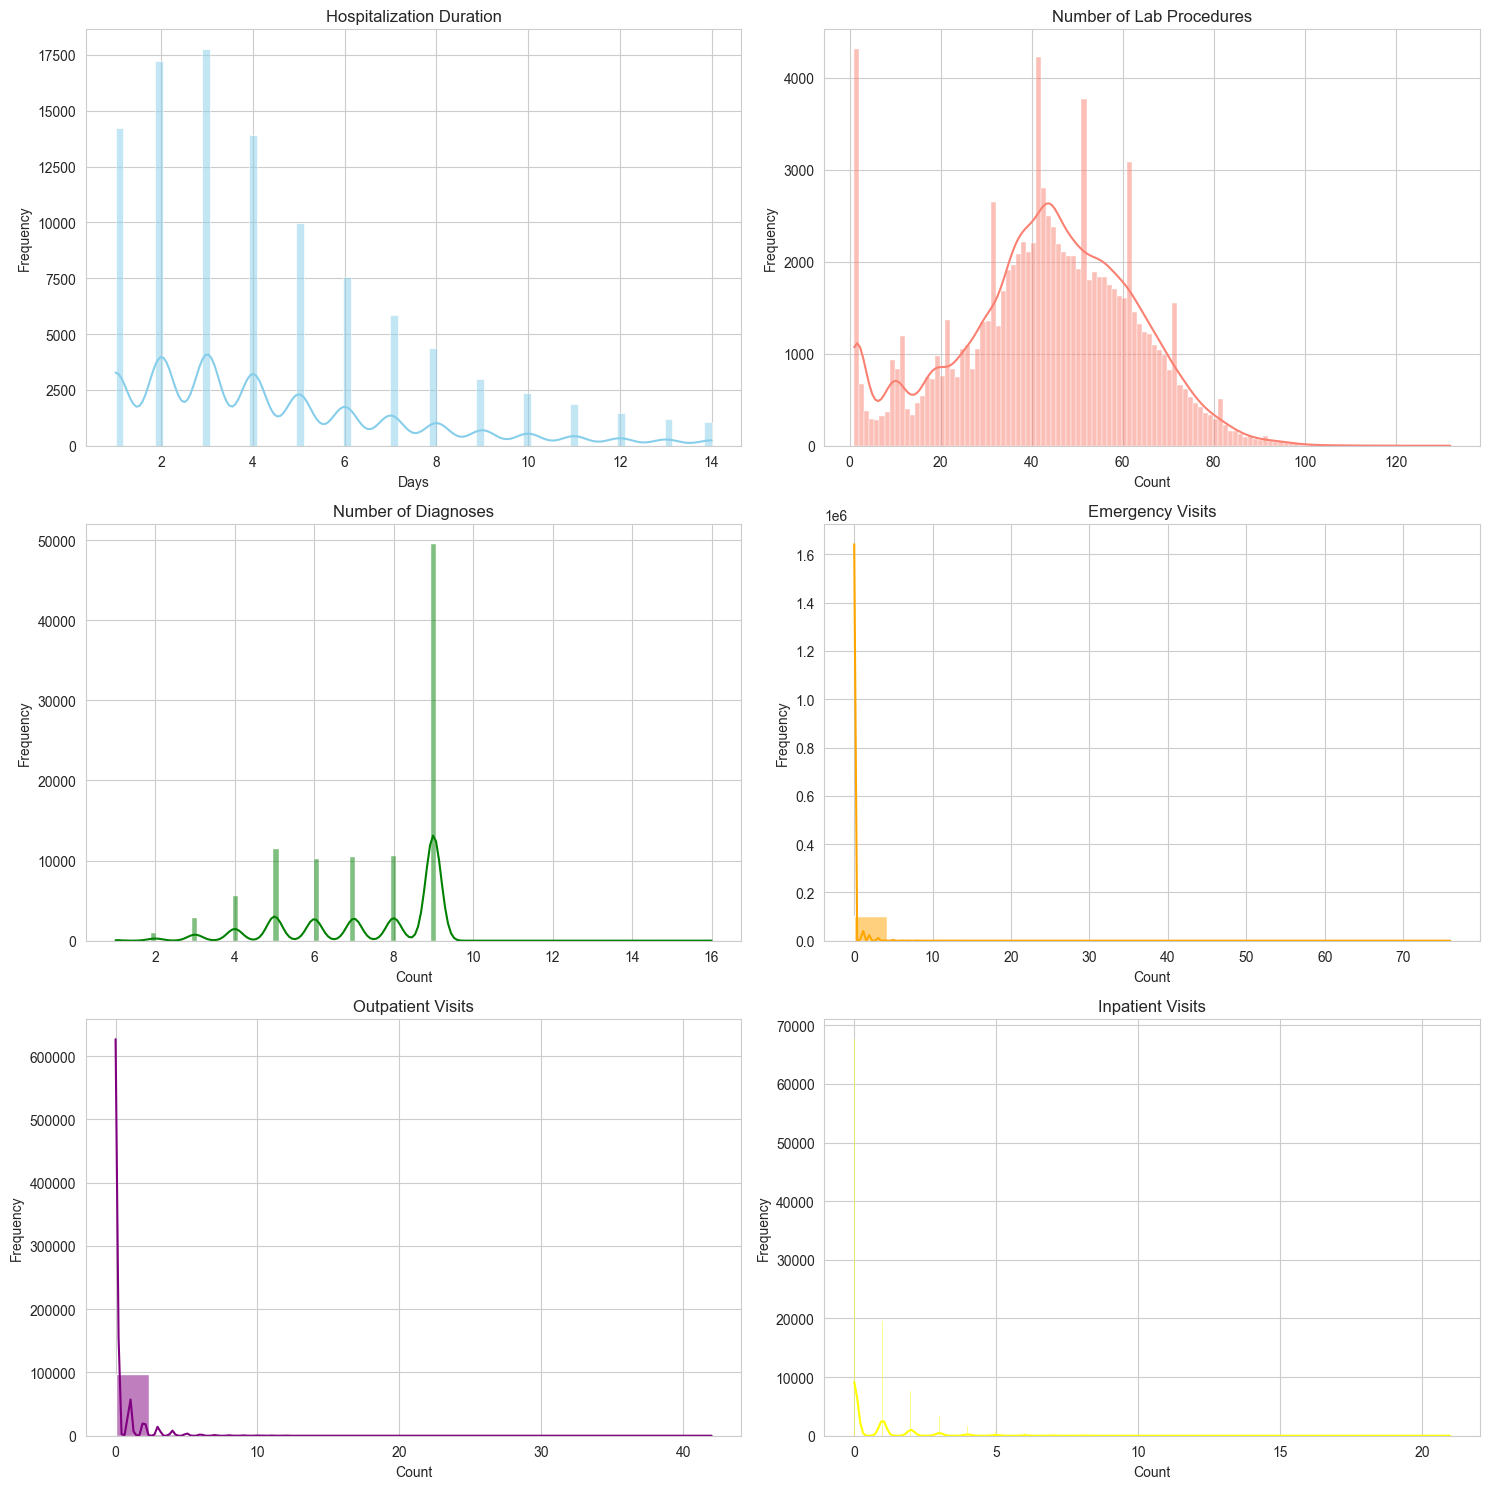

C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\641818862.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='readmitted', order=df['readmitted'].value_counts().index, palette='pastel')


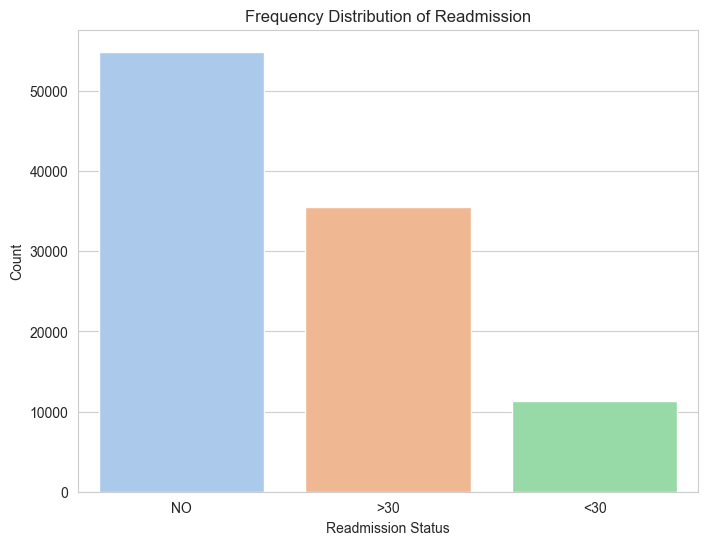

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df['time_in_hospital'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Hospitalization Duration')
axs[0, 0].set_xlabel('Days')
axs[0, 0].set_ylabel('Frequency')


sns.histplot(df['num_lab_procedures'], kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Number of Lab Procedures')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('Frequency')


sns.histplot(df['number_diagnoses'], kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Number of Diagnoses')
axs[1, 0].set_xlabel('Count')
axs[1, 0].set_ylabel('Frequency')

# Plot 4 - Emergency Visits
sns.histplot(df['number_emergency'], kde=True, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Emergency Visits')
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('Frequency')

# Plot 5 - Outpatient Visits
sns.histplot(df['number_outpatient'], kde=True, ax=axs[2, 0], color='purple')
axs[2, 0].set_title('Outpatient Visits')
axs[2, 0].set_xlabel('Count')
axs[2, 0].set_ylabel('Frequency')

sns.histplot(df['number_inpatient'], kde=True, ax=axs[2, 1], color='yellow')
axs[2, 1].set_title('Inpatient Visits')
axs[2, 1].set_xlabel('Count')
axs[2, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Plot Frequency Distribution of Readmission
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='readmitted', order=df['readmitted'].value_counts().index, palette='pastel')
plt.title('Frequency Distribution of Readmission')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()


In [86]:
# FILETR OUT THE medictaion from the dataframe metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
medication_li = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'examide',
                 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


label_encoder = LabelEncoder()

# Fit LabelEncoder with medication list
label_encoder.fit(medication_li)

# Loop through medication columns and apply label encoding
for med_col in medication_li:
    df_cp[med_col + '_trans'] = label_encoder.fit_transform(df[med_col])
    df_cp.drop(columns=[med_col], inplace=True)


df_cp

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,acarbose_trans,miglitol_trans,troglitazone_trans,tolazamide_trans,insulin_trans,glyburide-metformin_trans,glipizide-metformin_trans,glimepiride-pioglitazone_trans,metformin-rosiglitazone_trans,metformin-pioglitazone_trans
0,2278392,8222157,Caucasian,Female,[0-10),?,1,25,1,1,...,1,1,0,0,1,1,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,1,1,0,0,3,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,1,1,0,0,1,1,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,1,1,0,0,3,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,1,1,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,1,1,0,0,0,1,0,0,0,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,1,1,0,0,2,1,0,0,0,0
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,1,1,0,0,0,1,0,0,0,0
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,1,1,0,0,3,1,0,0,0,0


In [87]:
# drop some columns that are not reuqired
# weight','payer_code','medical_specialty' has hoghest missing values so we aare just droping them
# addmission soure id and discharge_disposition_id has 25 different values so im putting them i drop column beacuse it can possiblly can cause man categories
# df_cp = df.copy()



df_cp.drop(columns=['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'discharge_disposition_id',
                'admission_source_id', 'payer_code', 'medical_specialty', 'readmitted', 'max_glu_serum', 'citoglipton',
                 'discharge_disposition_id', 'diag_1', 'diag_2', 'diag_3', 'diabetesMed', 'change'], inplace=True)

# df_cp.drop(columns = ['diag_1', 'diag_2', 'diag_3'], inplace=True)


Text(0.5, 1.0, 'Number of medication used VS. Readmission')

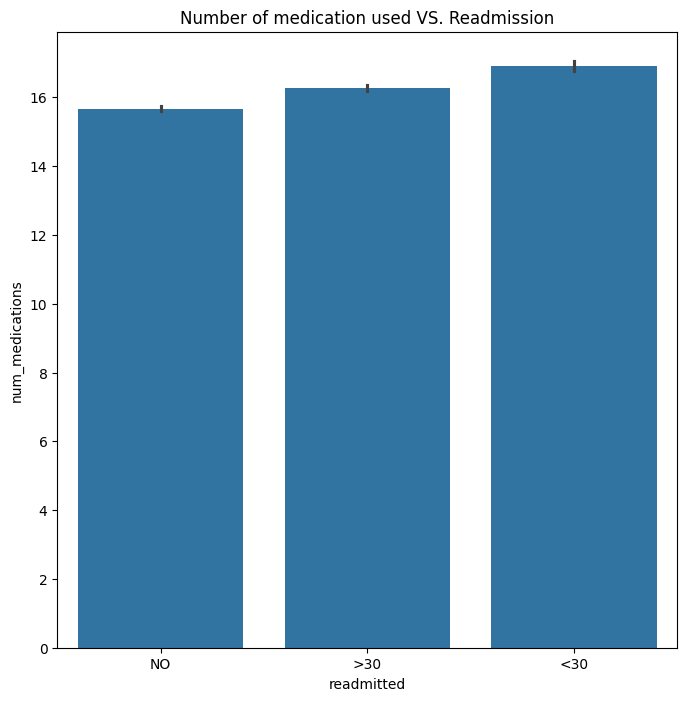

In [88]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

In [89]:

# feature selection sing random forest classification
# Ensure results are repeatable
import numpy as np

np.random.seed(100)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Extract the features and target variable from the DataFrame
X = df_cp[0:7000].drop(columns=['readmitted_trans'])
y = df_cp[0:7000]['readmitted_trans']

In [90]:
# Initialize RandomForestClassifier for feature ranking
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=100)

# RFE feature selector
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)

# Fit RFE to the data
rfe_selector.fit(X, y)
selected_features = X.columns[rfe_selector.support_]
print("Selected features:", selected_features)

# Print feature ranking
print("Feature ranking:", rfe_selector.ranking_)


Selected features: Index(['time_in_hospital', 'num_lab_procedures', 'num_medications',
       'number_diagnoses', 'age_trans'],
      dtype='object')
Feature ranking: [ 9  1  1  2  1 17 19  5  1  6  1  8  4  7 29 21 30 20 34 18 13 12 22 31
 24 35 15 32 11 10 26 16 14 23 33 27 25  3 28 36 37 38 39]


In [91]:
# dropping few column beacus ethe random forest estimattor is taking long time to run dropping the 
# features that are not related to medictaion
df_cp.drop(columns=['age_trans', 'gender_trans', 'race_trans', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'], inplace = True)
X = df_cp[0:7000].drop(columns=['readmitted_trans'])
y = df_cp[0:7000]['readmitted_trans']

In [92]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=100)

# RFE feature selector to predict the medication features
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)

# Fit RFE to the data
rfe_selector.fit(X, y)
selected_features = X.columns[rfe_selector.support_]
print("selected features:", selected_features)

# Print feature ranking
print("feature ranking:", rfe_selector.ranking_)

selected features: Index(['admission_type_id', 'A1Cresult', 'metformin_trans', 'glyburide_trans',
       'insulin_trans'],
      dtype='object')
feature ranking: [ 1  1  6 23 10 21  8 18  7 11  1  9 19 13 26  4 20  2  1 15  5  3 12 22
 16 14  1 17 24 25 27 28]


In [93]:
# this features that contribute to target varibles
features_df = df[['gender_trans', 'race_trans', 'age_trans', 'time_in_hospital', 'num_lab_procedures', 'number_diagnoses', 'medication_trans']]
traget = df['readmitted']

Descriptive Statistics for Features:
        gender_trans     race_trans      age_trans  time_in_hospital  \
count  101766.000000  101766.000000  101766.000000     101766.000000   
mean        0.462443       2.598776      65.967022          4.395987   
std         0.498649       0.938415      15.940838          2.985108   
min         0.000000       0.000000       5.000000          1.000000   
25%         0.000000       3.000000      55.000000          2.000000   
50%         0.000000       3.000000      65.000000          4.000000   
75%         1.000000       3.000000      75.000000          6.000000   
max         2.000000       5.000000      95.000000         14.000000   

       num_lab_procedures  number_diagnoses  medication_trans  \
count       101766.000000     101766.000000     101766.000000   
mean            43.095641          7.422607          1.405469   
std             19.674362          1.933600          0.838798   
min              1.000000          1.000000          0

C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\1704805186.py:8: FutureWarning: ['readmitted'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  central_tendency = features_df.agg(['mean', 'median'])
C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\1704805186.py:11: FutureWarning: ['readmitted'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dispersion = features_df.agg(['std', lambda x: x.max() - x.min()])


In [94]:
print(set(list(features_df['gender_trans'])))
print(features_df.shape)

{0, 1, 2}
(101766, 7)


In [95]:
features_df['gender_trans'].value_counts()

0    54708
1    47055
2        3
Name: gender_trans, dtype: int64

In [96]:
# drop the colunmns with invalid gender
df_filtered_gen = features_df[features_df['gender_trans'] != 2]
df_filtered_gen.shape

(101763, 7)

In [97]:
features_df['readmitted'] = list(df['readmitted'])

features_df['readmitted_trans'] = label_encoder.fit_transform(features_df['readmitted'])
print("Encoded values:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print(features_df['readmitted_trans'].head())


Encoded values:
{'<30': 0, '>30': 1, 'NO': 2}
0    2
1    1
2    2
3    2
4    2
Name: readmitted_trans, dtype: int32


C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\679943603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['readmitted'] = list(df['readmitted'])
C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\679943603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['readmitted_trans'] = label_encoder.fit_transform(features_df['readmitted'])


C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\3024806473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features_df.corr()


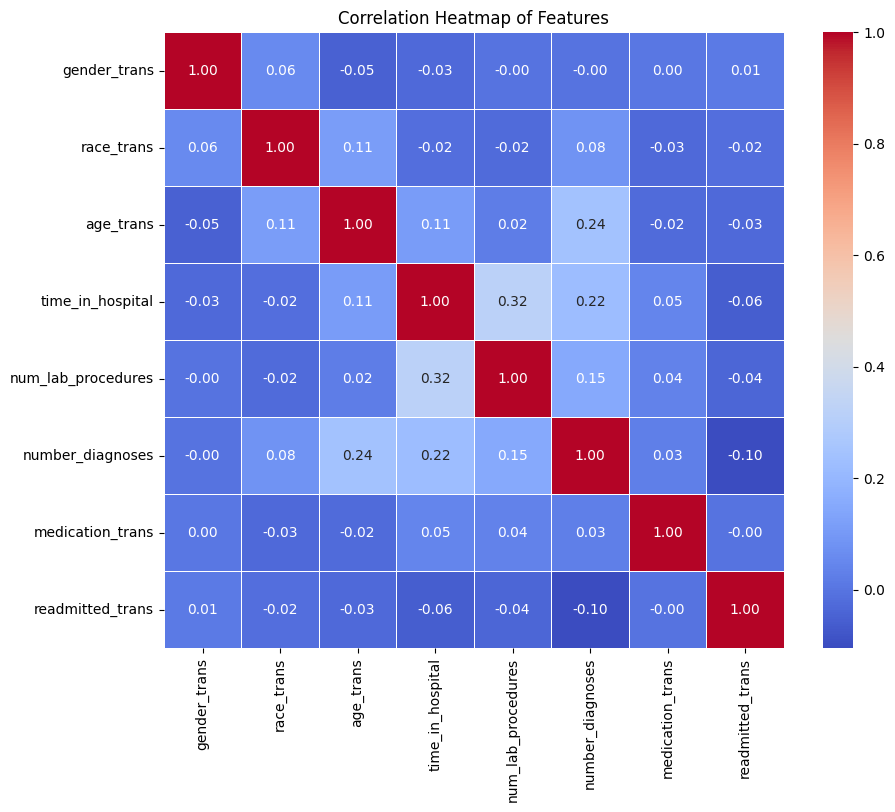

In [98]:
correlation_matrix = features_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Create a pairplot to visualize pairwise relationships between numerical features


In [99]:
target_corr = correlation_matrix['readmitted_trans'].drop('readmitted_trans')  # Drop target variable itself
corr = target_corr[abs(target_corr) > 0.1]  # Example threshold for strong correlation
print("Strong Correlations with Target Variable 'readmitted':")
print(corr)

Strong Correlations with Target Variable 'readmitted':
number_diagnoses   -0.10482
Name: readmitted_trans, dtype: float64


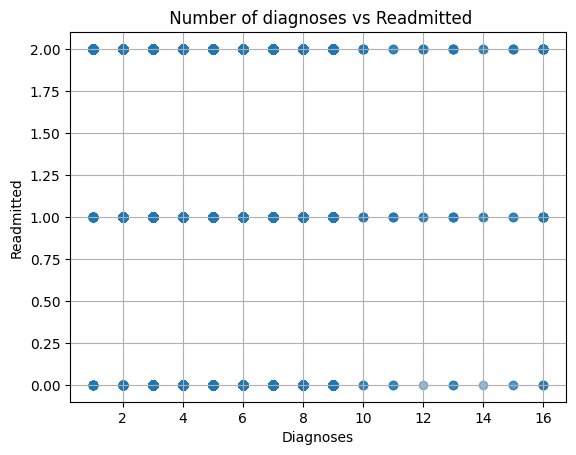

In [100]:
# plot map between readmitted and number of diagnosies

plt.scatter(features_df['number_diagnoses'], features_df['readmitted_trans'], alpha=0.5)
plt.title(' Number of diagnoses vs Readmitted')
plt.xlabel('Diagnoses')
plt.ylabel('Readmitted')
plt.grid(True)
plt.show()

C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\3326559347.py:6: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = features_df.cov()


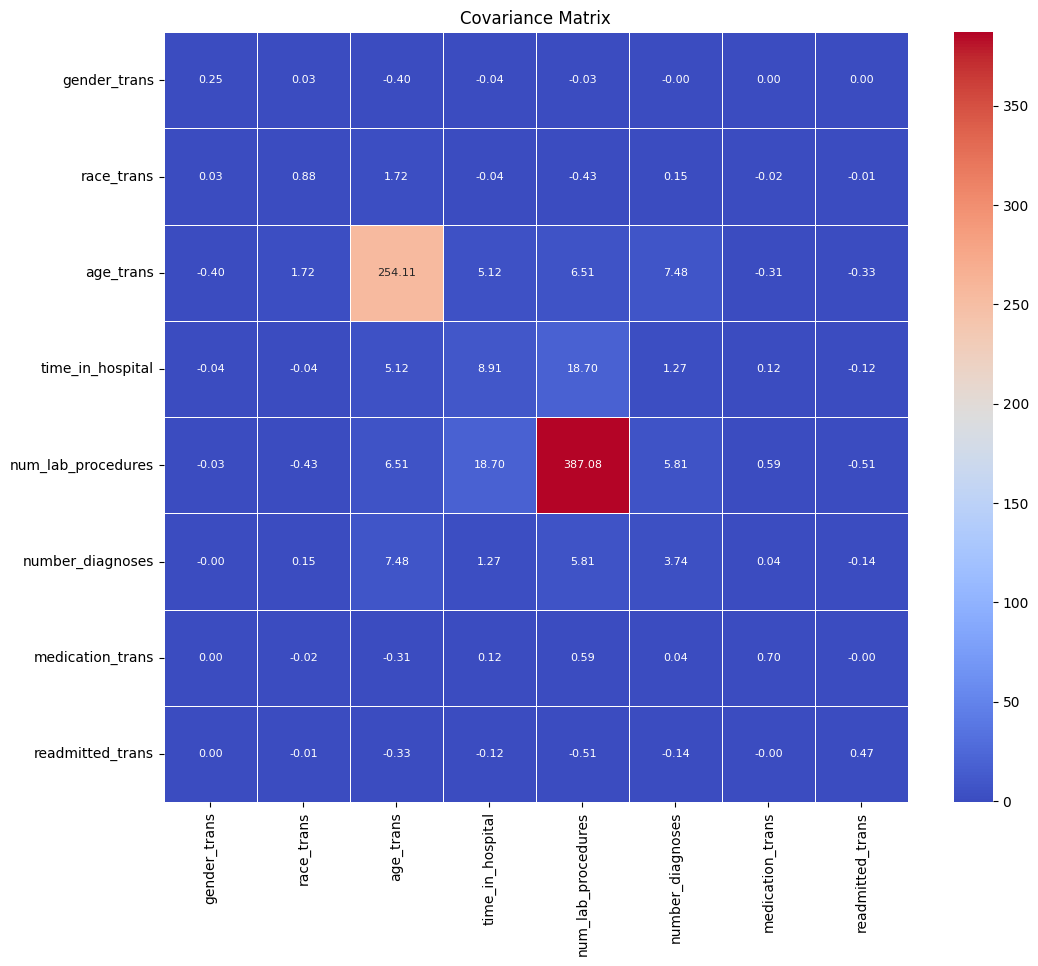

In [101]:
import seaborn as sns
df_nor = features_df.copy()
#df_nor_cp_ref = df_nor_cp_ref[df_nor_cp_ref['country'] == "Afghanistan"]
#df_nor = df_nor.drop(columns = {'year', 'country'})
#df_nor_cp1 = df_nor_cp[['oil_co2_per_capita', 'cement_co2_per_capita', 'gas_co2_per_capita','co2' ]]
cov_matrix = features_df.cov()
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 8})
plt.title('Covariance Matrix')
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [103]:
X_train, X_test, y_train, y_test = train_test_split(features_df.drop(['readmitted', 'readmitted_trans'], axis=1), features_df['readmitted_trans'], test_size=0.2, random_state=42)

In [104]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\5505\virtual_env\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
coef = model.coef_[0]
coef

array([-0.09811813, -0.07497369, -0.00474954,  0.0245572 , -0.00197493,
        0.02411626, -0.11539822])

In [106]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("the acuuracy of the model:",accuracy)

the acuuracy of the model: 0.5391569224722413


In [107]:
# lets do cross validation check
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)

D:\5505\virtual_env\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\5505\virtual_env\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross-Validation Scores: [0.53902843 0.5397654  0.53949146 0.53949146 0.53936863]


D:\5505\virtual_env\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# scaling the few features to findout the accuracy 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['age_trans', 'time_in_hospital', 'num_lab_procedures', 'number_diagnoses']
scaled_df = features_df.copy()  # Make a copy of the original dataframe
scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])
scaled_df.head()
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop(['readmitted', 'readmitted_trans'], axis=1), scaled_df['readmitted_trans'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
coef = model.coef_[0]
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("the acuuracy of the model:",accuracy)

# scaling the features also lead to same accuracy

the acuuracy of the model: 0.5377812714945466


In [108]:
# not scaling the few features to findout the accuracy 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#columns_to_scale = ['age_trans', 'num_lab_procedures', 'number_diagnoses']
scaled_df = features_df.copy()  # Make a copy of the original dataframe
#scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])
#scaled_df.head()
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop(['readmitted', 'readmitted_trans'], axis=1), scaled_df['readmitted_trans'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
coef = model.coef_[0]
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("the acuuracy of the model:",accuracy)

# scaling the features also lead to same accuracy

the acuuracy of the model: 0.5391569224722413


D:\5505\virtual_env\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


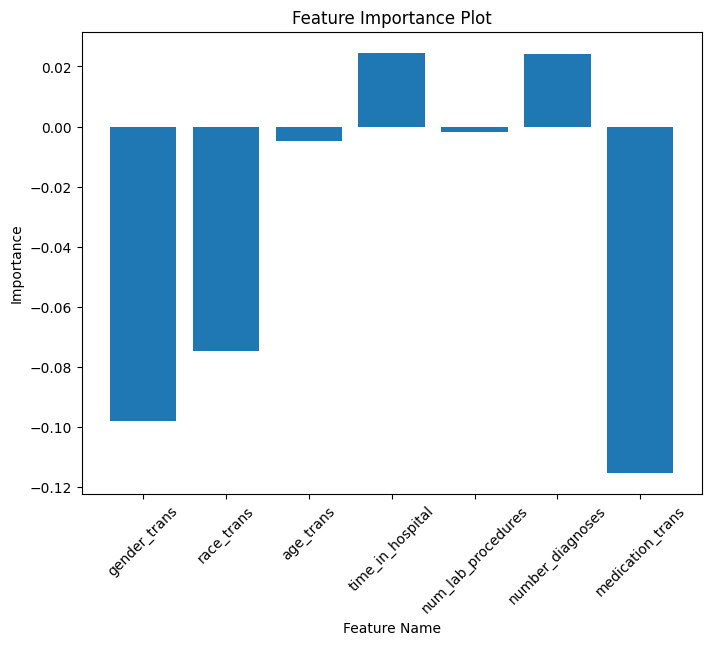

In [109]:
new_df = features_df.drop(['readmitted_trans','readmitted'] , axis=1)
plt.figure(figsize=(8, 6))
plt.bar(new_df.columns, coef)
plt.title('Feature Importance Plot')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted') 
print("Precision:",precision )
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:",recall)

Precision: 0.46610635015936386
Recall: 0.5391569224722413


D:\5505\virtual_env\new_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1score)

F1 score: 0.38475216963847125


In [112]:

df[df['gender_trans'] != 'Unknown/Invalid']
df['diabetesMed_trans'] = label_encoder.fit_transform(df['diabetesMed'])
print("Encoded values:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
# add this to features_df
features_df['diabetes_med'] = list(df['diabetesMed_trans']) 

Encoded values:
{'No': 0, 'Yes': 1}


C:\Users\kmitt\AppData\Local\Temp\ipykernel_32416\1182031678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['diabetes_med'] = list(df['diabetesMed_trans'])


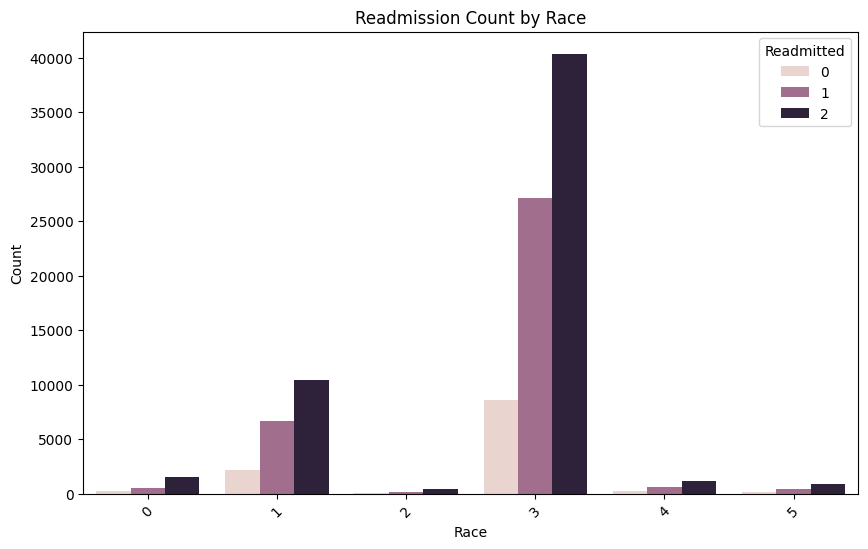

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race_trans', hue='readmitted_trans', data=features_df)
plt.title('Readmission Count by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmitted', loc='upper right')
plt.show()

In [114]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
#from h2o.estimators import H2OScaler
from h2o.grid.grid_search import H2OGridSearch

h2o.init()

features_df.drop(columns=['readmitted'])
h2o_df = h2o.H2OFrame(features_df)
features = list(features_df.drop(columns = ['readmitted_trans']))

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 day 21 hours 12 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_kmitt_2fk7mz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.561 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [129]:
train, test = h2o_df.split_frame(ratios=[0.8], seed=123)
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, seed=123)
model.train(x=features, y='readmitted_trans', training_frame=train)

predictions = model.predict(test)

# Evaluate model performance
performance = model.model_performance(test)
print(performance)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 2.451508300930694e-05
RMSE: 0.004951270847904297
MAE: 0.0010956980747391246
RMSLE: 0.004161478320850385
Mean Residual Deviance: 2.451508300930694e-05


In [117]:
from h2o.grid.grid_search import H2OGridSearch

# Define hyperparameter grid
hyperparameters = {
    'ntrees': [50, 100, 150],
    'max_depth': [10, 20, 30]
}

# Perform grid search
grid = H2OGridSearch(model=H2ORandomForestEstimator(seed=123),
                     hyper_params=hyperparameters)

grid.train(x=features, y='readmitted_trans', training_frame=train)

# obatin thebest model using the gridd search
best_model = grid.get_grid()

# Refit the best model on the entire traning dataset
best_model.train(x=features, y='readmitted_trans', training_frame=train)


drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,model_ids,residual_deviance
,30.0,150.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_9,0.0000333
,20.0,150.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_8,0.0000341
,30.0,100.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_6,0.0000453
,20.0,100.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_5,0.0000470
,30.0,50.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_3,0.0000643
,20.0,50.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_2,0.0000671
,10.0,150.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_7,0.0006387
,10.0,100.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_4,0.0007668
,10.0,50.0,Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_1,0.0011635


In [119]:
best_model[0]

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: Grid_DRF_py_5_sid_a82c_model_python_1714068865113_12_model_9


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    150                150                         245370                 2            24           12.9333       3             537           124.973

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3.3325140410422686e-05
RMSE: 0.0057727931203554045
MAE: 0.0009776650159633064
RMSLE: 0.00464977291935182
Mean Residual Deviance: 3.3325140410422686e-05

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse          training_mae           training_deviance
---  -------------------  ----------  -----------------  ---------------------  ---------------------  ----------------------
     2024-04-27 10:31:05  17.628 sec  0.0                nan                    nan                    nan
     2024-04-27 10:31:05  17.654 sec  1.0                0.009999000149975004   9.998000399920016e-05  9.998000399920016e-05
     2024-04-27 10:31:05  17.665 sec  2.0                0.005536789614905936   4.087471898630697e-05  3.0656039239730225e-05
     2024-04-27 10:31:05  17.665 sec  3.0                0.004970594782494787   3.294241665568586e-05  2.4706812491764396e-05
     2024-04-27 10:31:05  17.696 sec  4.0                0.017930793796218404   0.0003847168483995779  0.0003215133661625044
     2024-04-27 10:31:05  17.744 sec  5.0                0.023197311507385746   0.0007587897714043089  0.0005381152611706912
     2024-04-27 10:31:05  17.806 sec  6.0                0.021624002108067857   0.0007859524436255155  0.0004675974671697231
     2024-04-27 10:31:05  17.827 sec  7.0                0.018021303143432244   0.0006560165478571551  0.0003247673669874809
     2024-04-27 10:31:05  17.843 sec  8.0                0.015508380862735758   0.0005615845266966933  0.0002405098769836687
     2024-04-27 10:31:05  17.858 sec  9.0                0.013876194603412622   0.0004946086203811213  0.00019254877667177755
---  ---                  ---         ---                ---                    ---                    ---
     2024-04-27 10:31:09  21.394 sec  123.0              0.0062225047201922     0.0009963891348774463  3.871956499281422e-05
     2024-04-27 10:31:09  21.421 sec  124.0              0.00619695593606736    0.0009967827779001376  3.8402262873560494e-05
     2024-04-27 10:31:09  21.452 sec  125.0              0.006196813561975985   0.0010007321994038789  3.840049832188949e-05
     2024-04-27 10:31:09  21.468 sec  126.0              0.006147131886980721   0.0009927882737493072  3.778723043593516e-05
     2024-04-27 10:31:09  21.499 sec  127.0              0.006117133217542435   0.000989243864119471   3.741931880116106e-05
     2024-04-27 10:31:09  21.515 sec  128.0              0.006068657625169267   0.000981439572347284   3.6828605371525085e-05
     2024-04-27 10:31:09  21.531 sec  129.0              0.006027753733400642   0.0009766138597424284  3.6333815070525375e-05
     2024-04-27 10:31:09  21.576 sec  130.0              0.006078139883199904   0.0009926504217715884  3.694378443974533e-05
     2024-04-27 10:31:09  21.592 sec  131.0              0.006073908772360124   0.0009930657893717405  3.689236777495327e-05
     2024-04-27 10:31:09  22.032 sec  150.0              0.0057727931203554045  0.0009776650159633064  3.3325140410422686e-05
[133 rows x 7 columns]


Variable Importances: 
variable            relative_importance    scaled_importance    percentage
------------------  ---------------------  -------------------  ------------
readmitted          4.11961e+06            1                    0.989146
number_diagnoses 

In [130]:
from h2o.estimators import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator()

# Train the model
gbm.train(x=features, y='readmitted_trans', training_frame=train)

# Make predictions
predictions = gbm.predict(test)
predictions.as_data_frame().head()


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


D:\5505\virtual_env\new_env\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict
0,1.997058
1,1.997058
2,1.002211
3,1.002211
4,1.002211


In [132]:
gbm_performance = gbm.model_performance(test)
gbm_performance

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.2340195248984766e-05
RMSE: 0.0035128614047503733
MAE: 0.0031688162410611126
RMSLE: 0.002625305127240343
Mean Residual Deviance: 1.2340195248984766e-05